In [1]:
import pickle
from functools import partial

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from joblib import delayed, Parallel

from utils import bracket_0, rfc_W
from common import Bracket
from seeding import Seeding
from mcmc import MetropolisHastingsBracket

In [2]:
bracket = Bracket.NaiveBracket(bracket_0(), rfc_W())
bracket.score()

1.7312309603721477e-15

In [3]:
mhb = MetropolisHastingsBracket(bracket_0(), win_matrix=rfc_W(), simulate_anneal=True)
mhb.run(3000)[-1].score()

score: 7.820175372861222e-15: 100%|██████████| 3000/3000 [00:01<00:00, 2091.25it/s]


7.820175372861222e-15

In [4]:
W = rfc_W()
b = bracket_0()
_i, _j = np.meshgrid(range(64), range(64))
mat = np.zeros((64, 64))
for (ni, i) in tqdm(list(enumerate(_i))):
    for nj, j in enumerate(_j):
        mat[ni, nj] = W[b[_i[ni, nj]], b[_j[ni, nj]]]
df = pd.DataFrame(mat, columns=[i.name for i in b], index=[i.name + "_l" for i in b])
df.style.background_gradient(cmap='Blues')

100%|██████████| 64/64 [00:10<00:00,  6.11it/s]


,Alabama,Texas A&M-Corpus Christi,Maryland,West Virginia,San Diego State,College of Charleston,Virginia,Furman,Creighton,NC State,Baylor,UC Santa Barbara,Missouri,Utah State,Arizona,Princeton,Purdue,Fairleigh Dickinson,Memphis,Florida Atlantic,Duke,Oral Roberts,Tennessee,Louisiana,Kentucky,Providence,Kansas State,Montana State,Michigan State,Southern California,Marquette,Vermont,Houston,Northern Kentucky,Iowa,Auburn,Miami (FL),Drake,Indiana,Kent State,Iowa State,Pittsburgh,Xavier,Kennesaw State,Texas A&M,Penn State,Texas,Colgate,Kansas,Howard,Arkansas,Illinois,Saint Mary's (CA),Virginia Commonwealth,Connecticut,Iona,TCU,Arizona State,Gonzaga,Grand Canyon,Northwestern,Boise State,UCLA,UNC Asheville
Alabama_l,0.560000,0.360000,0.460000,0.420000,0.540000,0.450000,0.500000,0.460000,0.460000,0.470000,0.460000,0.330000,0.460000,0.460000,0.490000,0.380000,0.510000,0.280000,0.520000,0.430000,0.500000,0.470000,0.440000,0.400000,0.450000,0.480000,0.430000,0.450000,0.440000,0.470000,0.480000,0.380000,0.520000,0.380000,0.420000,0.470000,0.470000,0.420000,0.510000,0.480000,0.440000,0.470000,0.410000,0.400000,0.420000,0.390000,0.500000,0.390000,0.650000,0.340000,0.470000,0.490000,0.530000,0.480000,0.580000,0.460000,0.460000,0.470000,0.520000,0.400000,0.510000,0.470000,0.590000,0.470000
Texas A&M-Corpus Christi_l,0.740000,0.510000,0.620000,0.570000,0.680000,0.670000,0.610000,0.660000,0.660000,0.620000,0.630000,0.590000,0.550000,0.650000,0.740000,0.590000,0.730000,0.400000,0.630000,0.690000,0.640000,0.730000,0.600000,0.610000,0.630000,0.640000,0.530000,0.700000,0.590000,0.640000,0.580000,0.590000,0.720000,0.490000,0.610000,0.600000,0.590000,0.620000,0.660000,0.560000,0.510000,0.600000,0.620000,0.640000,0.560000,0.570000,0.600000,0.610000,0.660000,0.520000,0.570000,0.630000,0.660000,0.540000,0.680000,0.600000,0.560000,0.620000,0.700000,0.560000,0.610000,0.610000,0.680000,0.680000
Maryland_l,0.630000,0.370000,0.480000,0.460000,0.640000,0.410000,0.490000,0.460000,0.540000,0.430000,0.500000,0.410000,0.480000,0.530000,0.570000,0.430000,0.580000,0.320000,0.500000,0.510000,0.460000,0.550000,0.460000,0.450000,0.510000,0.460000,0.450000,0.620000,0.440000,0.460000,0.510000,0.480000,0.600000,0.410000,0.430000,0.520000,0.460000,0.490000,0.520000,0.480000,0.480000,0.450000,0.500000,0.490000,0.400000,0.370000,0.540000,0.490000,0.600000,0.420000,0.520000,0.530000,0.590000,0.410000,0.500000,0.530000,0.490000,0.480000,0.620000,0.390000,0.480000,0.530000,0.570000,0.450000
West Virginia_l,0.610000,0.430000,0.580000,0.520000,0.590000,0.430000,0.510000,0.510000,0.570000,0.490000,0.510000,0.470000,0.440000,0.570000,0.630000,0.510000,0.600000,0.290000,0.480000,0.550000,0.590000,0.500000,0.500000,0.500000,0.600000,0.600000,0.400000,0.600000,0.500000,0.510000,0.500000,0.500000,0.630000,0.420000,0.480000,0.480000,0.460000,0.500000,0.570000,0.490000,0.420000,0.530000,0.520000,0.510000,0.450000,0.460000,0.490000,0.540000,0.590000,0.420000,0.460000,0.540000,0.560000,0.480000,0.550000,0.450000,0.470000,0.510000,0.610000,0.410000,0.510000,0.590000,0.570000,0.470000
San Diego State_l,0.560000,0.380000,0.430000,0.400000,0.500000,0.450000,0.480000,0.480000,0.420000,0.430000,0.440000,0.380000,0.460000,0.450000,0.450000,0.410000,0.480000,0.300000,0.470000,0.480000,0.480000,0.560000,0.420000,0.470000,0.420000,0.450000,0.430000,0.500000,0.420000,0.410000,0.460000,0.420000,0.560000,0.390000,0.390000,0.420000,0.430000,0.470000,0.500000,0.520000,0.420000,0.400000,0.430000,0.440000,0.400000,0.370000,0.470000,0.410000,0.600000,0.370000,0.460000,0.440000,0.510000,0.440000,0.520000,0.460000,0.440000,0.420000,0.510000,0.390000,0.460000,0.450000,0.570000,0.490000
College of Charleston_l,0.630000,0.350000,0.380000,0.430000,0.520000,0.520000,0.490000,0.390000,0.450000,0.450000,0.530000,0.330000,0.410000,0.390000,0.490000,0.340000,0.540000,0.300000,0.480000,0.580000,0.440000,0.560000,0.510000,0.400000,0.440000,0.410000,0.520000,0.330000,0.420000,0.500000,0.420000,0.350000,0.540000,0.280000,0

In [5]:
d = df.T.mean().sort_values()
t = [list(filter(lambda x: x.name == i.split("_")[0], b))[0] for i in d.index.tolist()]
s = Seeding(t, W)
print(s)
print(s.mean_variance(iters=100000))
print(s.find_maximimum_likelihood_bracket(iters=3000, verbose=True).score())
print(s.mlb.depth_error())
print(s.mlb.outcome_error(s))

(1) Houston
(1) Saint Mary's (CA)
(1) UCLA
(1) Marquette
(2) Purdue
(2) Connecticut
(2) College of Charleston
(2) Kansas State
(3) Texas
(3) Baylor
(3) San Diego State
(3) Tennessee
(4) Gonzaga
(4) Alabama
(4) Kansas
(4) Indiana
(5) Virginia
(5) Oral Roberts
(5) Maryland
(5) Boise State
(6) Florida Atlantic
(6) Kentucky
(6) Arizona
(6) Creighton
(7) Virginia Commonwealth
(7) West Virginia
(7) Texas A&M
(7) Arkansas
(8) Utah State
(8) Northwestern
(8) Miami (FL)
(8) UC Santa Barbara
(9) Duke
(9) Iowa State
(9) Xavier
(9) NC State
(10) Providence
(10) Southern California
(10) Michigan State
(10) Memphis
(11) Furman
(11) Kent State
(11) Illinois
(11) Arizona State
(12) Iowa
(12) TCU
(12) Louisiana
(12) Drake
(13) Penn State
(13) Vermont
(13) Iona
(13) Auburn
(14) Pittsburgh
(14) UNC Asheville
(14) Northern Kentucky
(14) Missouri
(15) Texas A&M-Corpus Christi
(15) Grand Canyon
(15) Howard
(15) Colgate
(16) Princeton
(16) Montana State
(16) Kennesaw State
(16) Fairleigh Dickinson


score: 8.518373682191089e-18: 100%|██████████| 100000/100000 [00:54<00:00, 1841.49it/s]


-281.2330269811499


score: 5.672201873522068e-15: 100%|██████████| 3000/3000 [00:01<00:00, 2260.44it/s]


5.672201873522068e-15
129
138


In [6]:
ncaa_seed = Seeding(Seeding.inverse_arrange(bracket_0()), W)
print(ncaa_seed)
print(ncaa_seed.mean_variance(iters=100000))
print(ncaa_seed.find_maximimum_likelihood_bracket(iters=3000, verbose=True).score())
print(ncaa_seed.mlb.depth_error())
print(ncaa_seed.mlb.outcome_error(ncaa_seed))

(1) Alabama
(1) Houston
(1) Kansas
(1) Purdue
(2) UCLA
(2) Texas
(2) Arizona
(2) Marquette
(3) Baylor
(3) Gonzaga
(3) Kansas State
(3) Xavier
(4) Connecticut
(4) Tennessee
(4) Indiana
(4) Virginia
(5) San Diego State
(5) Duke
(5) Saint Mary's (CA)
(5) Miami (FL)
(6) Iowa State
(6) Creighton
(6) Kentucky
(6) TCU
(7) Texas A&M
(7) Michigan State
(7) Missouri
(7) Northwestern
(8) Memphis
(8) Arkansas
(8) Maryland
(8) Iowa
(9) Florida Atlantic
(9) West Virginia
(9) Auburn
(9) Illinois
(10) Boise State
(10) Penn State
(10) Southern California
(10) Utah State
(11) NC State
(11) Providence
(11) Pittsburgh
(11) Arizona State
(12) College of Charleston
(12) Oral Roberts
(12) Drake
(12) Virginia Commonwealth
(13) Kent State
(13) Iona
(13) Furman
(13) Louisiana
(14) Kennesaw State
(14) UC Santa Barbara
(14) Grand Canyon
(14) Montana State
(15) Vermont
(15) Colgate
(15) Princeton
(15) UNC Asheville
(16) Fairleigh Dickinson
(16) Howard
(16) Northern Kentucky
(16) Texas A&M-Corpus Christi


score: 8.459134582489102e-19: 100%|██████████| 100000/100000 [00:50<00:00, 1997.96it/s]


-279.148098867578


score: 7.093458620662113e-15: 100%|██████████| 3000/3000 [00:01<00:00, 1784.10it/s]


7.093458620662113e-15
127
148


[-265.5832836519396, -266.0067877520398, -266.1621224099787, -266.1842491465035, -266.32071874726483, -266.51932607995536, -267.0496586168245, -267.13666805325664, -267.26164521398886, -267.2841957442484, -267.49778406203103, -267.5647113629887, -267.8055958316656, -267.8429594971389, -267.8732799897813, -267.8754014842269, -267.8867710382485, -267.9860449658699, -267.9872377658715, -268.02586795795554, -268.033821963864, -268.07154758718605, -268.0937914458235, -268.1038569317781, -268.14142886288727, -268.20691973763246, -268.21473863940713, -268.24723289665377, -268.3004924516474, -268.32785673174817, -268.3750255820653, -268.4239920516815, -268.44384390871335, -268.44705490789755, -268.4563472843261, -268.4790445186249, -268.5048913338228, -268.73132544952455, -268.7410091795204, -268.7502196963656, -268.7664405060469, -268.8917696598929, -268.9017006058539, -268.91429724639147, -268.97410576029074, -269.01106677276664, -269.0212075276317, -269.0420374147822, -269.048732905009, -26

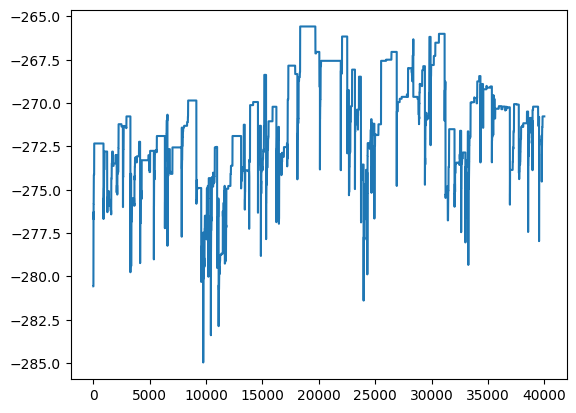

100%|██████████| 10/10 [00:00<00:00, 559.13it/s]


[-273.15385612377133, -269.8750009769947, -270.94529546790557, -272.87000692696023, -272.192584412732, -269.43814631091254, -270.4415696928278, -270.7260955808499, -271.59671733178556, -272.3419817742851]


In [10]:
TOP_K = 10
with open("./seeding_optim_for_use.pkl", "rb") as doc:
    _optimal_seed = pickle.load(doc)
optimal_seed = []
scores = []
for s in _optimal_seed:
    if s._score not in scores and s._score is not None:
        optimal_seed.append(s)
        scores.append(s._score)
print(sorted(scores, reverse=True))
plt.plot([i._score for i in _optimal_seed])
plt.show()
optimal_seed = [i[-1] for i in sorted([(i._score if i._score is not None else -1000000, n, i) for n, i in enumerate(optimal_seed)])[-TOP_K:]]
for seed in optimal_seed:
    seed._score = None
    seed.win_matrix = W
def mv(x):
    return x.mean_variance(iters=100000)
scores = Parallel(n_jobs=8)(delayed(partial(x.mean_variance, iters=100000, verbose=False))() for x in tqdm(optimal_seed))#scores = process_map(mv, optimal_seed)#.append(seed.mean_variance(iters=100000))
optimal_seed = optimal_seed[np.argmax(scores)]
print(scores)

In [11]:
optimal_seed.win_matrix = W
print(optimal_seed)
print(optimal_seed.mean_variance(iters=100000))
print(optimal_seed.find_maximimum_likelihood_bracket(iters=3000, verbose=True).score())
print(optimal_seed.mlb.depth_error())
print(optimal_seed.mlb.outcome_error(optimal_seed))

(1) Marquette
(1) Alabama
(1) Houston
(1) Connecticut
(2) UCLA
(2) Baylor
(2) Kansas
(2) Gonzaga
(3) Tennessee
(3) Florida Atlantic
(3) Saint Mary's (CA)
(3) Purdue
(4) College of Charleston
(4) Kentucky
(4) Oral Roberts
(4) San Diego State
(5) Texas
(5) Virginia
(5) Creighton
(5) Virginia Commonwealth
(6) Maryland
(6) Boise State
(6) Northwestern
(6) Arizona
(7) Arkansas
(7) Kansas State
(7) Indiana
(7) Duke
(8) Drake
(8) Xavier
(8) Iowa State
(8) Utah State
(9) West Virginia
(9) Pittsburgh
(9) Southern California
(9) Michigan State
(10) Memphis
(10) Miami (FL)
(10) Furman
(10) Texas A&M
(11) UC Santa Barbara
(11) Kent State
(11) Providence
(11) Auburn
(12) Vermont
(12) Iowa
(12) NC State
(12) Illinois
(13) Louisiana
(13) Penn State
(13) Arizona State
(13) TCU
(14) Texas A&M-Corpus Christi
(14) UNC Asheville
(14) Missouri
(14) Iona
(15) Colgate
(15) Grand Canyon
(15) Northern Kentucky
(15) Montana State
(16) Howard
(16) Princeton
(16) Kennesaw State
(16) Fairleigh Dickinson


score: 2.4875683640290394e-17: 100%|██████████| 100000/100000 [00:58<00:00, 1714.83it/s]


-270.0978440435142


score: 1.8418488644498387e-14: 100%|██████████| 3000/3000 [00:01<00:00, 2282.55it/s]


1.8418488644498387e-14
99
138
